# _Titanic Survivor Prediction - Classification Project_
**_Importing the required libraries & packages_**

In [1]:
import numpy as np
import pandas as pd
import ydata_profiling as pf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory & Path and Reading The Dataset Using Pandas Command and displaying the first five observation in the dataframe_**

In [2]:
os.chdir('C:\\Users\\chand\\OneDrive\\Desktop\\Titanic Project\\')
df = pd.read_csv('Titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

## _Exploratory Data analysis_
**_Checking for the duplicate value in the dataframe_**

In [3]:
df.duplicated().sum()

0

**_Checking for the null value in all the columns from the dataframe_**

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**_Gettintg the shape of the dataframe._**

In [5]:
df.shape

(418, 12)

**_Getting the Dtypes and Non-null count of all the columns from the dataset using <span style='color:violet'> Info() </span> statement_**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**_Getting the summary of various descriptive statistics for the numeric column in the dataframe_**

In [7]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

**_Automated Exploratory Data Analysis (EDA) with ydata_profiling(pandas_profiling)_**

In [8]:
EDA_Report = pf.ProfileReport(df)
EDA_Report.to_file('EDA_Report.html')
EDA_Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## _Data Cleaning_
**_Getting the null values from the `Fare` column for the null value treatment process and displaying the dataframe with null values in the `Fare` column_**

In [9]:
df[df.Fare.isnull()]

PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
152         1044         0       3  Storey, Mr. Thomas  male  60.5      0   

     Parch Ticket  Fare Cabin Embarked  
152      0   3701   NaN   NaN        S

**_Getting the null value of `Fare` column with respect to `Pclass` column of the dataframe and filling the missing value of the `Fare` column with the calculated mean value and displaying the mean fare of the 3rd class passenger which is filled in the place of null value_**

In [10]:
Fare_mean = df.Fare[df.Pclass == 3].mean()
df['Fare'].fillna(value = Fare_mean , inplace = True)

**_After missing value treatment , Checking the null value in the `Fare` columns._**

In [11]:
df['Fare'].isnull().sum()

0

_**Displaying all the null value in the `Age` column in the dataframe**_

In [12]:
df[df['Age'].isnull()]

PassengerId  Survived  Pclass  \
10           902         0       3   
22           914         1       1   
29           921         0       3   
33           925         1       3   
36           928         1       3   
..           ...       ...     ...   
408         1300         1       3   
410         1302         1       3   
413         1305         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex  Age  SibSp  \
10                                    Ilieff, Mr. Ylio    male  NaN      0   
22                Flegenheim, Mrs. Alfred (Antoinette)  female  NaN      0   
29                                   Samaan, Mr. Elias    male  NaN      2   
33   Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"  female  NaN      1   
36                                 Roth, Miss. Sarah A  female  NaN      0   
..                                                 ...     ...  ...    ...   
408                    Riordan, Miss. Johanna Hannah""  female  NaN      0   
410                             Naughton, Miss. Hannah  female  NaN      0   
413                                 Spector, Mr. Woolf    male  NaN      0   
416                                Ware, Mr. Frederick    male  NaN      0   
417                           Peter, Master. Michael J    male  NaN      1   

     Parch      Ticket     Fare Cabin Embarked  
10       0      349220   7.8958   NaN        S  
22       0    PC 17598  31.6833   NaN        S  
29       0        2662  21.6792   NaN        C  
33       2  W./C. 6607  23.4500   NaN        S  
36       0      342712   8.0500   NaN        S  
..     ...         ...      ...   ...      ...  
408      0      334915   7.7208   NaN        Q  
410      0      365237   7.7500   NaN        Q  
413      0   A.5. 3236   8.0500   NaN        S  
416      0      359309   8.0500   NaN        S  
417      1        2668  22.3583   NaN        C  

[86 rows x 12 columns]

**_Getting the mean value of the `Age` column in the appropriate format depending on the categories found in the `Name` columns such as <span style='color:violet'> Mr. , Ms. , Miss. , Master </span> and displaying the mean value of `Age` all the four categories from the `Name` columns_**

In [13]:
mean_age_mr = '{0:.2f}'.format(df[df['Name'].str.contains('Mr.',na = False)]['Age'].mean())
mean_age_mrs = '{0:.2f}'.format(df[df['Name'].str.contains('Mrs.',na = False)]['Age'].mean())
mean_age_miss = '{0:.2f}'.format(df[df['Name'].str.contains('Miss.',na = False)]['Age'].mean())
mean_age_master = '{0:.2f}'.format(df[df['Name'].str.contains('Master',na = False)]['Age'].mean())
print('Age of Adult Men :',mean_age_mr)
print('Age of Married women :',mean_age_mrs)
print('Age of Unmarried Women :',mean_age_miss)
print('Age of Childrens :',mean_age_master)

Age of Adult Men : 33.75
Age of Married women : 38.90
Age of Unmarried Women : 21.77
Age of Childrens : 7.41


**_Defining the function to fill the null value in the `Age` column from the dataframe , we got mean value for the four categories and hereby finding one another category which is having the null value so filling it out with the founded mean values of <span style='color:violet'> Mr. , Ms. ,Mrs. , Miss. , Master </span> if there is no missing value return the actual age from the age column._**

In [14]:
def fill_age(name_age): 
    name = name_age[0] 
    age = name_age[1] 
    if pd.isnull(age): 
        if 'Mr.' in name: 
            return mean_age_mr 
        if 'Mrs.' in name: 
            return mean_age_mrs 
        if 'Miss.' in name: 
            return mean_age_miss 
        if 'Master.' in name: 
            return mean_age_master 
        if 'Ms.' in name: 
            return mean_age_miss 
    else: 
        return age

**_Filling the null value of `Age` column using the defined function and displaying the null value in the `Age` column from the dataframe after missing value to treatment to cross-verify_**

In [15]:
df['Age'] = df[['Name','Age']].apply(fill_age,axis = 1)
df['Age'].isnull().sum()

0

**_Label Encoding the `Sex` Column from the dataframe using cat codes function_**

In [16]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

**_One hot Encoding the `Embarked` column from the dataframe using pandas get dummies function_**

In [17]:
emb_dum = pd.get_dummies(df['Embarked'],drop_first = True)
df = pd.concat([df,emb_dum],axis = 1)

**_Checking the datatype of all column from the dataframe to drop the <span style='color:violet'> ~Object~ </span> data type column for futher proceeding._**

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex               int8
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Q                uint8
S                uint8
dtype: object

**_Dropping the column `PassengerId` , `Name` , `Cabin` , `Embarked` , `Ticket` from the dataframe which is not needed_**

In [19]:
df.drop(['PassengerId','Name','Cabin','Embarked','Ticket'],axis = 1,inplace = True)

## _Data Visuvalisation_
**_Getting the correlation value from the needed columns from the dataframe. using seaborn Heatmap & saving the PNG file_**

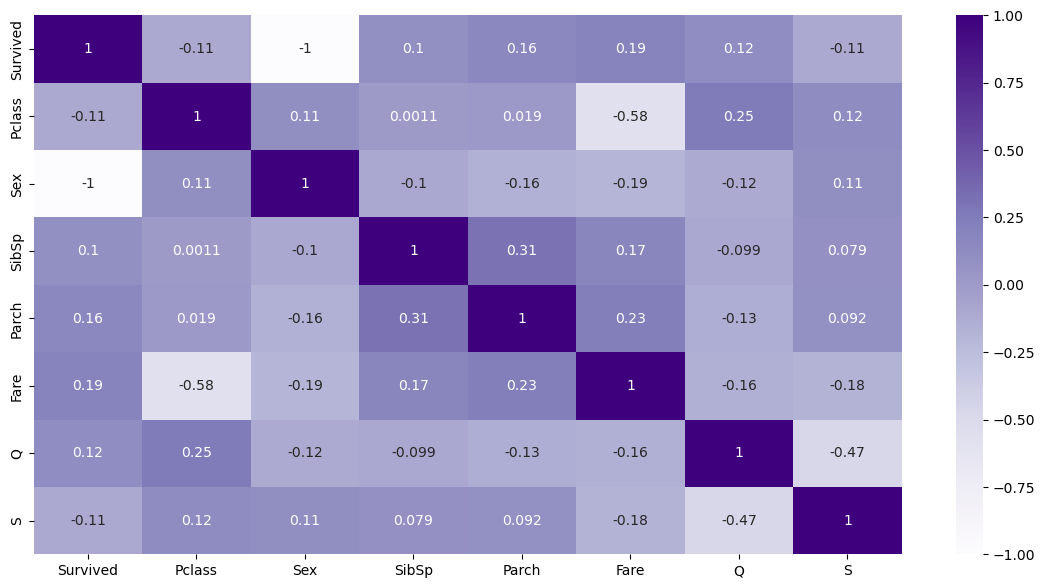

In [20]:
plt.rcParams['figure.figsize'] = (14,7)
sns.heatmap(df.corr(),annot = True,cmap = 'Purples',cbar = True )
plt.savefig('Correlation Heatmap.png')
plt.show()

**_Plotting the Bar Graph with count of `Survived` Passenger and identify the number of passenger who survived and saving the png file._**

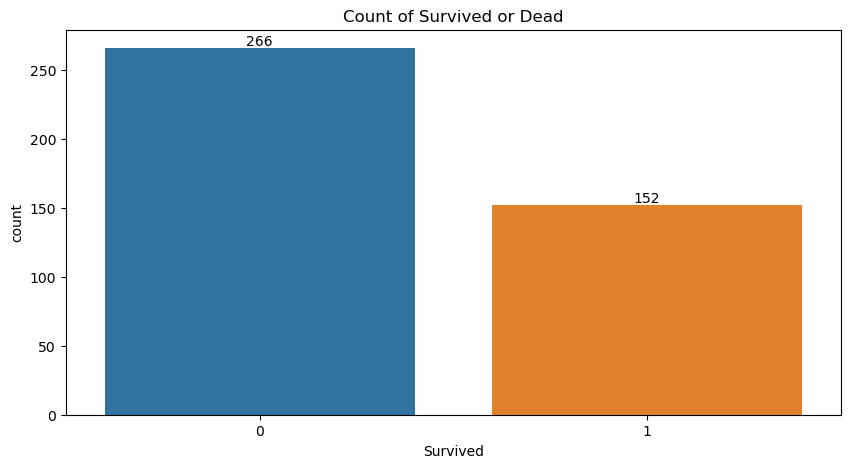

In [21]:
plt.figure(figsize = (10,5))
plot = sns.countplot(x=df['Survived'],data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Count of Survived or Dead')
plt.savefig('Count of Survived or Dead.png')
plt.show()

**_Plotting the Bar Graph with count of Passenger travelled in the various class with their gender count got from `Pclass` , `Sex` column and identify the gender of passenger travelled in the different passeanger classes from the dataframe and saving the png file._**

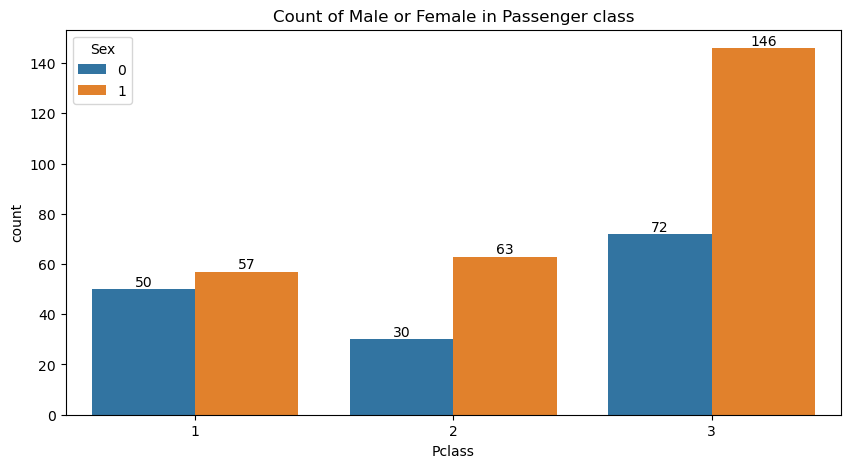

In [22]:
plt.figure(figsize = (10,5))
plot = sns.countplot(x=df['Pclass'],hue = df['Sex'],data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Count of Male or Female in Passenger class')
plt.savefig('Count of Male or Female in Passenger class.png')
plt.show()

**_Plotting the Bar Graph with count of `Age` of the passenger and identify all the age group of passenger travelled in the titanic and saving the png file._**

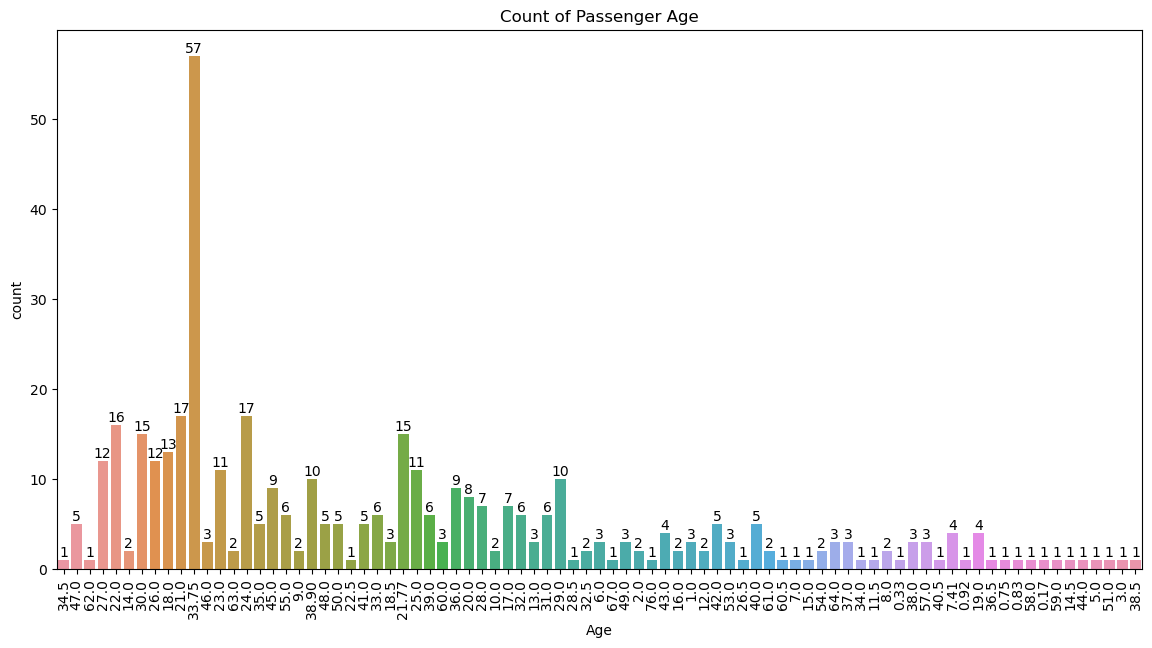

In [23]:
plt.figure(figsize = (14,7))
plot = sns.countplot(x=df['Age'],data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.xticks(rotation = 90)
plt.title('Count of Passenger Age')
plt.savefig('Count of Passenger Age.png')
plt.show()

**_Assigning the dependent and independent variable. In the independent variable along with the dependent variable column also dropping `Sex` cokumn since the correlation heat map shows negative correaltion in the `Sex` column from the dataframe_**

In [24]:
x = df.drop(['Survived','Sex'],axis = 1)
y = df['Survived']

## _Data Preprocessing_
**_Standardizing the independent variable of the dataframe using MinMaxScaler Function._**

In [25]:
MinMax = MinMaxScaler()
x = MinMax.fit_transform(x)

## _Model Fitting_
**_Defining the Function for the ML algorithms using <span style='color:violet'>RandomizedSearchCV </span> Algorithm and splitting the dependent variable & independent variable into training and test dataset and Predicting the Dependent Variable by fitting the given model and create the pickle file of the model with the given Algo_name. Further getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap._**

In [26]:
def FitModel(x,y,algo_name,algorithm,random_param,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 16)
    RSC = RandomizedSearchCV(estimator = algorithm ,param_distributions = random_param ,scoring = 'accuracy',verbose = 0,
                            n_iter = 100 , n_jobs = 1, cv = cv)
    RSC_result = RSC.fit(x_train,y_train)
    pred = RSC_result.predict(x_test)
    best_params = RSC_result.best_params_
    best_estimators = RSC_result.best_estimator_
    pickle.dump(RSC_result,open(algo_name,'wb'))
    print('Algorithm Name :',algo_name,'\n')
    print('Best Params :',best_params,'\n')
    print('Best Estimator :',best_estimators,'\n')
    print('Percentage of Accuracy Score {0:.2f} %'.format(100*accuracy_score(y_test,pred)),'\n')
    print('Classification Report :\n',classification_report(y_test,pred))
    plt.rcParams['figure.figsize'] = (2,2)
    sns.heatmap(confusion_matrix(y_test,pred),annot = True ,cbar = True,square = True)

**_Running the function with empty parameters since the <span style='color:violet'>Logistic Regression </span> model doesn't need any special parameters and fitting the Logistic Regression and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name Logistic Regression._**

Algorithm Name : Logistic Regression 

Best Params : {} 

Best Estimator : LogisticRegression() 

Percentage of Accuracy Score 72.62 % 

Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.93      0.83        59
           1       0.60      0.24      0.34        25

    accuracy                           0.73        84
   macro avg       0.67      0.59      0.58        84
weighted avg       0.70      0.73      0.68        84



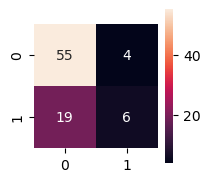

In [27]:
params = {}
FitModel(x,y,'Logistic Regression',LogisticRegression(),params,cv = 10)

**_Running the function with some appropriate parameter and fitting the <span style='color:violet'>SVC </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name SVC._**

Algorithm Name : SVC 

Best Params : {'gamma': 1, 'C': 1000} 

Best Estimator : SVC(C=1000, gamma=1) 

Percentage of Accuracy Score 75.00 % 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        59
           1       0.59      0.52      0.55        25

    accuracy                           0.75        84
   macro avg       0.70      0.68      0.69        84
weighted avg       0.74      0.75      0.75        84



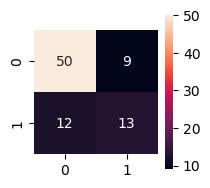

In [28]:
params = {'C': [0.1,1,100,1000],
         'gamma': [0.0001,0.001,0.005,0.1,1]}
FitModel(x,y,'SVC',SVC(),params,cv = 10)

**_Running the function with some appropriate parameter and fitting the <span style='color:violet'> KNeighborsClassifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name KNeighbors._**

Algorithm Name : KNeighbors 

Best Params : {'p': 2, 'n_neighbors': 10} 

Best Estimator : KNeighborsClassifier(n_neighbors=10) 

Percentage of Accuracy Score 64.29 % 

Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        59
           1       0.39      0.36      0.37        25

    accuracy                           0.64        84
   macro avg       0.56      0.56      0.56        84
weighted avg       0.63      0.64      0.64        84



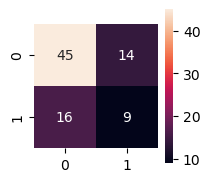

In [29]:
params = {'n_neighbors' : [5,10,15,20,25,30,35,40],
         'p' : [1,2]}
FitModel(x,y,'KNeighbors',KNeighborsClassifier(),params,cv=10)

**_Running the function with some appropriate parameter and fitting the <span style='color:violet'>Decision Tree Classifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name Decision Tree._**

Algorithm Name : Decision Tree 

Best Params : {'splitter': 'best', 'max_features': 'auto', 'criterion': 'entropy'} 

Best Estimator : DecisionTreeClassifier(criterion='entropy', max_features='auto') 

Percentage of Accuracy Score 63.10 % 

Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.66      0.72        59
           1       0.41      0.56      0.47        25

    accuracy                           0.63        84
   macro avg       0.60      0.61      0.60        84
weighted avg       0.67      0.63      0.64        84



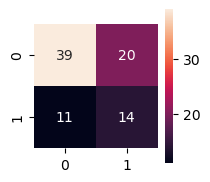

In [30]:
params = {'criterion':['gini','entropy'],
         'max_features':['auto','sqrt'],
         'splitter' : ['best','random']}
FitModel(x,y,'Decision Tree',DecisionTreeClassifier(),params,cv=10)

**_Running the function with some appropriate parameter and fitting the <span style='color:violet'>Random Forest Classifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name Random Forest._**

Algorithm Name : Random Forest 

Best Params : {'n_estimators': 555, 'max_features': 'sqrt', 'criterion': 'entropy'} 

Best Estimator : RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=555) 

Percentage of Accuracy Score 69.05 % 

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.71      0.76        59
           1       0.48      0.64      0.55        25

    accuracy                           0.69        84
   macro avg       0.65      0.68      0.66        84
weighted avg       0.72      0.69      0.70        84



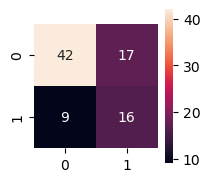

In [31]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion':['gini','entropy'],
         'max_features':['auto','sqrt']}
FitModel(x,y,'Random Forest',RandomForestClassifier(),params,cv=10)

**_Running the function with some appropriate parameter and fitting the <span style='color:violet'>Extra Trees Classifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name Extra Tree._**

In [ ]:
params = {'n_estimators':[111,222,333,444,555],
         'criterion':['gini','entropy'],
         'max_features':['auto','sqrt']}
FitModel(x,y,'Extra Tree',ExtraTreesClassifier(),params,cv = 10)

**_Running the function with empty parameters since the <span style='color:violet'>GaussianNB </span> model doesn't need any special parameters and fitting the GaussianNB and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name GaussianNB._**

In [ ]:
params = {}
FitModel(x,y,'GaussianNB',GaussianNB(),params,cv = 10)

**_Running the function with empty parameters since the <span style='color:violet'> BernoulliNB </span> model doesn't need any special parameters and fitting the BernoulliNB and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name BernoulliNB._**

In [ ]:
params = {}
FitModel(x,y,'BernoulliNB',BernoulliNB(),params,cv = 10)

**_Running the function with empty parameters since the <span style='color:violet'> MultinomialNB </span> model doesn't need any special parameters and fitting the MultinomialNB and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name MultinomialNB._**

In [ ]:
params = {}
FitModel(x,y,'MultinomialNB', MultinomialNB(),params,cv = 10)

**_Running the function with some appropriate parameter and fitting the <span style='color:violet'>XGB Classifier </span> algorithm and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name Extra Tree._**

In [ ]:
params = {'n_estimators':[111,222,333,444,555]}
FitModel(x,y,'XGBClassifier',XGBClassifier(),params,cv = 10)

**_Running the function with empty parameters since the <span style='color:violet'> CatBoostClassifier </span> model doesn't need any special parameters and fitting the CatBoostClassifier and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name Cat Boost._**

In [ ]:
params = {}
FitModel(x,y,'Cat Boost',CatBoostClassifier(verbose = 0),params,cv = 10)

**_Running the function with empty parameters since the <span style='color:violet'> LGBMClassifier </span> model doesn't need any special parameters and fitting the LGBM Regressor and getting the Algorithm Name, Best Parameters of the algorithm, best estimator of the fitted model ,Accuracy Score in percentage format,Classification Report and Confusion Matrix between the predicted values and dependent test dataset. Futher visuvalising the confusion matrix through seaborn heatmap and also creating the pickle file with the name Light GBM._**

In [ ]:
params = {}
FitModel(x,y,'Light GBM',LGBMClassifier(),params,cv = 10)

**_Loading the pickle file with the algorithm which give highest accuracy score_**

In [ ]:
model = pickle.load(open('GaussianNB','rb'))

**_For futher Prediction use the model loaded with Pickle File_**